## Perform principal component analysis on breast cancer data set to reduce dimensions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['target', 'DESCR', 'feature_names', 'target_names', 'data'])

### Create cancer data frame of data 

In [12]:
cancer_data=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [14]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Scaling of data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(cancer_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_cancer=scaler.transform(cancer_data)

In [21]:
scaled_cancer.shape

(569, 30)

## We have a scaled 569 by 30 array. We will reduce the number of features to two principal components that explain the most variance in the data

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=2)

In [24]:
pca.fit(scaled_cancer`)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_cancer=pca.transform(scaled_cancer)

In [26]:
pca_cancer.shape

(569, 2)

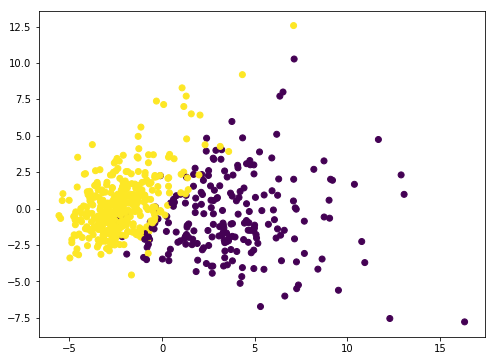

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(pca_cancer[:,0],pca_cancer[:,1],c=cancer['target'])

### clear distinction between the benign and malignant tumour based on these principal components

## Visualising the components

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

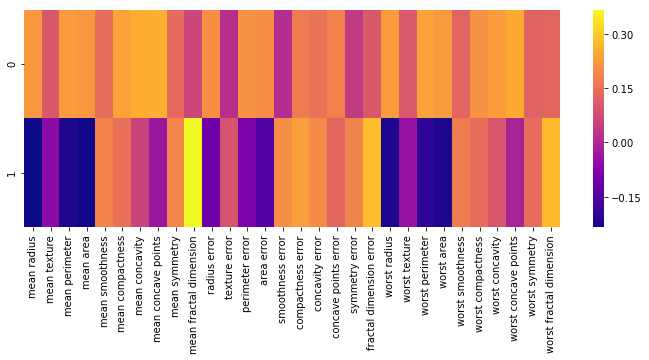

In [35]:
plt.figure(figsize=(12,4))
sns.heatmap(df_comp,cmap='plasma')

## On this reduced dimensionality dataset we can perform classification algorithms to distinguish the tumours